<a href="https://colab.research.google.com/github/jennlee0102/preview/blob/main/Video_Game_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# scipy
from scipy import stats
import scipy.stats as st

In [2]:
# # display all rows
# pd.set_option('display.max_row', None)

# # back to orig.
# pd.options.display.max_rows = 60

# What kind of Game should be developed for the next quarter?

1. preferred game genre by region
2. gaming trends by year
3. analysis on popular game and visualization

# Data Preparation & EDA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/1st project_game/vgames2.csv', index_col=0)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
# number of null values in each column
display(data.isnull().sum())

# unknown publisher
display(data[data['Publisher'] == 'Unknown'])

# display all the columns with NaN
data[data.isna().any(axis=1)]

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Kids Learn Music A+ Edition,DS,2011.0,Misc,Unknown,0.05,0,0,0
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
213,Wild West Shootout,Wii,2010.0,Shooter,Unknown,0.01,0.01,0,0
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
388,Gummy Bears Mini Golf,Wii,2010.0,Sports,Unknown,0.04,0,0,0
...,...,...,...,...,...,...,...,...,...
16401,Afrika,PS3,2008.0,Adventure,Unknown,0.12,0,0.08,0.01
16403,The Golf Club,XOne,2014.0,Sports,Unknown,0.02,0,0,0
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


data shape: (16598, 9) <br>
357 null values, 203 unknown publisher <br>

In [6]:
# drop all the null values & unknown publisher
data.dropna(subset = ['Year', 'Genre', 'Publisher'], inplace = True)
data.drop(data[data['Publisher'] == 'Unknown'].index, inplace=True)
data.shape

(16142, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16142 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16142 non-null  object 
 1   Platform     16142 non-null  object 
 2   Year         16142 non-null  float64
 3   Genre        16142 non-null  object 
 4   Publisher    16142 non-null  object 
 5   NA_Sales     16142 non-null  object 
 6   EU_Sales     16142 non-null  object 
 7   JP_Sales     16142 non-null  object 
 8   Other_Sales  16142 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [8]:
# change datatype of Year to int
data = data.astype({'Year': int})
display(data.sort_values(by=['Year'], axis=0))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2250,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
8682,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.6,0,0.2
11164,Momotarou Dentetsu 11,GC,2,Misc,Hudson Soft,0,0,0.07,0
8145,ESPN NFL Primetime 2002,XB,2,Sports,Konami Digital Entertainment,0.01,0,0,0
15613,Rally Fusion: Race of Champions,PS2,2,Racing,Activision,0.06,0.05,0,0.02
...,...,...,...,...,...,...,...,...,...
1975,Prison Architect,PS4,2016,Action,Introversion Software,0.01,0.01,0,0
10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
15234,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
5311,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0


In [9]:
data['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
         97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15, 1992,
       1991, 1983, 1988, 1981, 1989,   96,    3,    6,    9,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,   12,   94])

There're 3 digits data in ['Year'] column. I will replace less than 3 digits in ['Year'] column to 4 digits.

In [10]:
# as the result of ascending sort by Year col, it came out with 0~16, 86~98.
# 0<=x<=20 -> add 2000
# 20<x<1000 -> add 19 to the front
def year(x):
  if (0 <= x < 20):
    return int(2000 + x)
  elif (86 <= x <100):
    return int(1900 + x)
  else:
    return int(x)

data['Year'] = data['Year'].apply(year)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
# return Platform unique value
num_Plf = data['Platform'].unique()
print(len(num_Plf))
print('num_Plf: ', num_Plf)

# return Genre unique value
num_G = data['Genre'].unique()
print(len(num_G))
print('num_G: ', num_G)

# return Publisher unique value
num_pbls = data['Publisher'].unique()
print(len(num_pbls))
print('num_pbls: ', num_pbls)

31
num_Plf:  ['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
12
num_G:  ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
574
num_pbls:  ['Destineer' 'Namco Bandai Games' 'Alchemist' 'Zoo Games' 'D3Publisher'
 'Konami Digital Entertainment' 'Deep Silver' 'Tecmo Koei' 'Sega' 'THQ'
 'Empire Interactive' 'Ubisoft' 'Paradox Interactive' '505 Games'
 'Tomy Corporation' 'Eidos Interactive' 'Microsoft Game Studios'
 'Nippon Ichi Software' 'Kalypso Media' 'Electronic Arts'
 'Sony Computer Entertainment' 'Activision' 'Tru Blu Entertainment'
 'Warner Bros. Interactive Entertainment' 'Midway Games' 'Mindscape'
 'Wargaming.net' 'Capcom' 'Acclaim Entertainment' 'Nintendo'
 'Disney Interactive Studios' 'Crave Entertainment' 'Sunflowers'
 'Arc System Works' 'Milestone S.r.l' 'Kamui' 'Hu

refer to the website: https://www.vgchartz.com/charts/platform_totals/Hardware.php

**classification by publisher**

- Nintendo: 'DS', '3DS', 'Wii', 'WiiU', 'GB', 'GBA', 'NES', 'SNES', 'N64', 
- Microsoft: 'XB','X360','XOne'
- Panasonic: '3DO',
- Sony PSP: 'PSP', 'PS3', 'PS', 'PS4', 'PS2','PSV'
- GameCube: 'GC'
- Atari: '2600',
- Sega: 'SAT','GG', 'GEN', 'SCD', 
- Sonic: 'DC',
- Bandai: 'WS', 
- SNK: 'NG'
- NEC and Hudson Soft: 'PCFX', 'TG16',
- 'PC'
- Sega 'GG' is already discontinued in 1997 due to short battery life, lack of original games, and weak support from Sega

**append/join extra column to regroup by platform**<br>
(handheld, home, PC)

home video game console: 'Wii', 'WiiU', 'N64', '3DO', 'NES', 'SNES', 'PS', 'PS2', 'PS3', 'PS4', 'XB', 'X360', 'XOne', 'DC', '2600', 'GC', 'SAT', 'GEN', 'SCD', 'NG', 'TG16', 'PCFX' <br>
handheld video game console: 'GB', 'GBA', 'PSP', 'PSV', 'DS', '3DS', 'WS', 'GG'<br>
PC: 'PC'

In [12]:
# check if multi-platform game exists
df_dup = data[data.duplicated(['Name'])]
dup_cnt = df_dup['Name'].unique()
print(len(dup_cnt))
dup_cnt

2696


array(['Call of Duty 4: Modern Warfare', 'IL-2 Sturmovik: Birds of Prey',
       'NASCAR Unleashed', ..., "Super Ghouls 'n Ghosts", 'MindJack',
       'Toukiden: The Age of Demons'], dtype=object)

In [13]:
# create 'Multiplatform' column next to 'Platform'
data.insert(2, 'Multiplatform', data.duplicated(['Name'], keep=False))

# Platform can be categorized into Handheld, Home, PC -> make a new col and put it next to the Platform col.
data.insert(3, "Platform_Group", (np.where(data.Platform == 'PC', 'PC', np.where((data.Platform == 'GB') | (data.Platform == 'GBA') | (data.Platform == 'PSP') | (data.Platform == 'PSV') | (data.Platform == 'DS') | (data.Platform == '3DS') | (data.Platform == 'WS') | (data.Platform == 'GG'), 'Handheld', 'Home'))))

data.head()

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [14]:
# the sales Dtype is object due to string
data.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.29', '0.19',
       '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K', '0.13',
       '0.34', '0.05', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M', '1.56',
       

We can see that there're K, M following float.

In [15]:
# sales (in millions of units) per platform -> match unit to millions (K = 0.001, remove M)
def sales(vals) :
  if vals[-1:] == 'K' :
    vals = vals.replace('K', '')
    return float(vals) * 0.001
  elif vals[-1:] == 'M' :
    return float(vals.replace('M',''))
  else :
    return float(vals)

data['NA_Sales(M)'] = data['NA_Sales'].apply(sales)
data['EU_Sales(M)'] = data['EU_Sales'].apply(sales)
data['JP_Sales(M)'] = data['JP_Sales'].apply(sales)
data['Other_Sales(M)'] = data['Other_Sales'].apply(sales)

df = data.drop(columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
df = df.reset_index().drop(columns = 'index')

display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16142 entries, 0 to 16141
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16142 non-null  object 
 1   Platform        16142 non-null  object 
 2   Multiplatform   16142 non-null  bool   
 3   Platform_Group  16142 non-null  object 
 4   Year            16142 non-null  int64  
 5   Genre           16142 non-null  object 
 6   Publisher       16142 non-null  object 
 7   NA_Sales(M)     16142 non-null  float64
 8   EU_Sales(M)     16142 non-null  float64
 9   JP_Sales(M)     16142 non-null  float64
 10  Other_Sales(M)  16142 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 1.2+ MB


,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M)
0,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


None

In [16]:
# create a column of Total_Sales
df['Total_Sales(M)'] = df['NA_Sales(M)'] + df['EU_Sales(M)'] + df['JP_Sales(M)'] + df['Other_Sales(M)']
df.head()

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [17]:
df.sort_values(['Year','Total_Sales(M)']).reset_index()

,index,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,7126,Checkers,2600,False,Home,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.23
1,8989,Bridge,2600,False,Home,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2,12783,Freeway,2600,False,Home,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
3,13873,Boxing,2600,True,Home,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
4,9863,Defender,2600,True,Home,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16137,15055,FIFA 17,PS4,True,Home,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78
16138,5163,Brothers Conflict: Precious Baby,PSV,False,Handheld,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16139,14815,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,True,Handheld,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16140,9850,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,True,Home,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


<ipython-input-18-44497bdc648d>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(coff_df, dtype=np.bool)


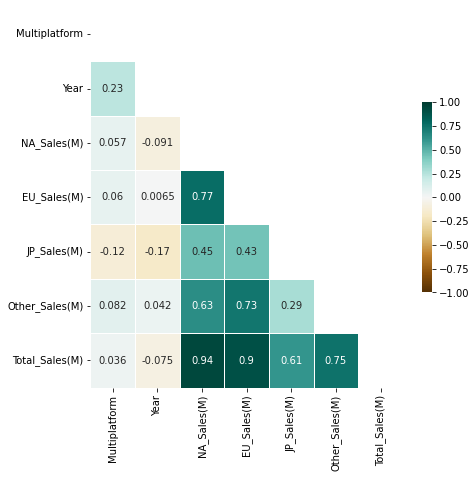

In [18]:
coff_df = df.corr()

# Figure Size
fig, ax = plt.subplots( figsize=(7,7) )

# create triangle mask (True for the above triangle, False for the below triangle)
mask = np.zeros_like(coff_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Heatmap
sns.heatmap(coff_df, 
            cmap = 'BrBG', 
            annot = True,             # mark the true value
            mask=mask,                # masking
            linewidths=.5,            # Separated by lines at the boundary
            cbar_kws={"shrink": .5},  # Reduce the size of the color bar by half
            vmin = -1,vmax = 1        # range of the color bar: -1 ~ 1
           )  
plt.show()

In [19]:
# average sales in every region

a=(df['NA_Sales(M)'].mean()*1000000)
b=(df['EU_Sales(M)'].mean()*1000000)
c=(df['JP_Sales(M)'].mean()*1000000)
d=(df['Other_Sales(M)'].mean()*1000000)
e=(df['Total_Sales(M)'].mean()*1000000)

print("The average sales in North America =", (f"${a:,.2f}")) #comma separated values till 3 decimal place and $ sign
print("The average sales in Europe =",(f"${b:,.2f}"))
print("The average sales in Japan =",(f"${c:,.2f}"))
print("The average sales in other regions =",(f"${d:,.2f}"))
print("The average sales globally =",(f"${e:,.2f}"))

The average sales in North America = $266,476.89
The average sales in Europe = $148,052.91
The average sales in Japan = $78,557.18
The average sales in other regions = $48,468.59
The average sales globally = $541,555.57


# Q1. Is there a trend of games by year?

1. Genre count by year<br>
2. platform_group by year

In [20]:
df_2000 = df[df['Year'] >= 2000]
df_2000.head()

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Candace Kane's Candy Factory,DS,True,Handheld,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,False,Home,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,False,Handheld,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,False,Handheld,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,True,Home,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


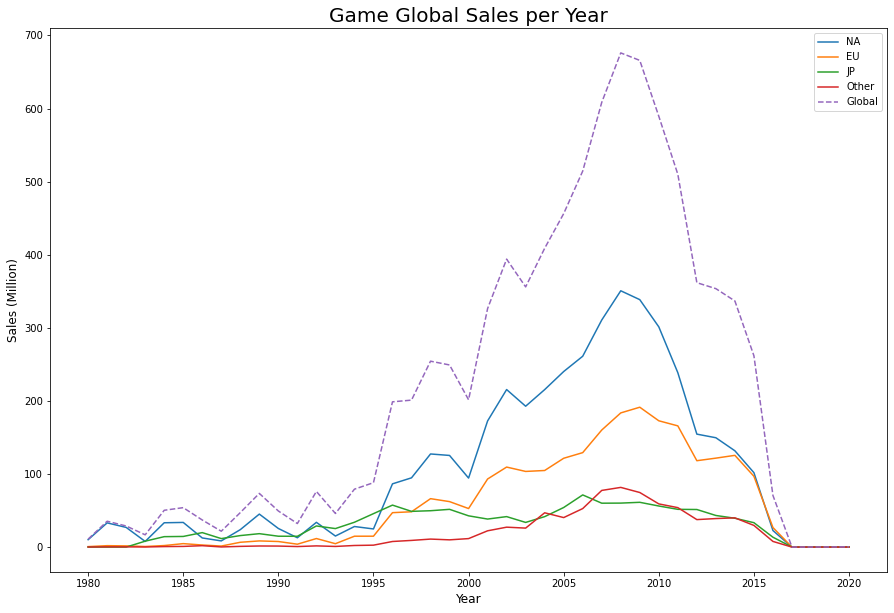

In [21]:
subset_year = df.groupby(by="Year").sum()
subset_year.drop("Multiplatform", axis=1 ,inplace=True)
subset_year = subset_year

plt.figure(figsize = (15,10))
ax = plt.gca()
plt.plot(subset_year.index, subset_year[subset_year.columns[0]], label = "NA")
plt.plot(subset_year.index, subset_year[subset_year.columns[1]], label = "EU")
plt.plot(subset_year.index, subset_year[subset_year.columns[2]], label = "JP")
plt.plot(subset_year.index, subset_year [subset_year.columns[3]], label = "Other")
plt.plot(subset_year.index, subset_year[subset_year.columns[4]], linestyle='--', label = "Global")

plt.legend(loc='best')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales (Million)', fontsize = 12)
plt.title('Game Global Sales per Year', fontsize = 20)
plt.show()

This plot shows the overall flow for the entire data. We can see a noticeable increase in sales since the 2000.
Let's use after-2000 data for the analysis with the recent data.

In [22]:
# Best Genre by Year
year_list = []
genre_list = []
sale_list = []

year_genre_df = df.groupby(['Year','Genre']).sum()['Total_Sales(M)'].reset_index()

for i in range(1980,2018):
    year_genre = year_genre_df[year_genre_df['Year'] == i].sort_values(by='Total_Sales(M)',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'Total_Sales(M)']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
year_genre_df = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'Total_Sales(M)'])
year_genre_df

,Year,Genre,Total_Sales(M)
0,1980,Shooter,7.07
1,1981,Action,14.50
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


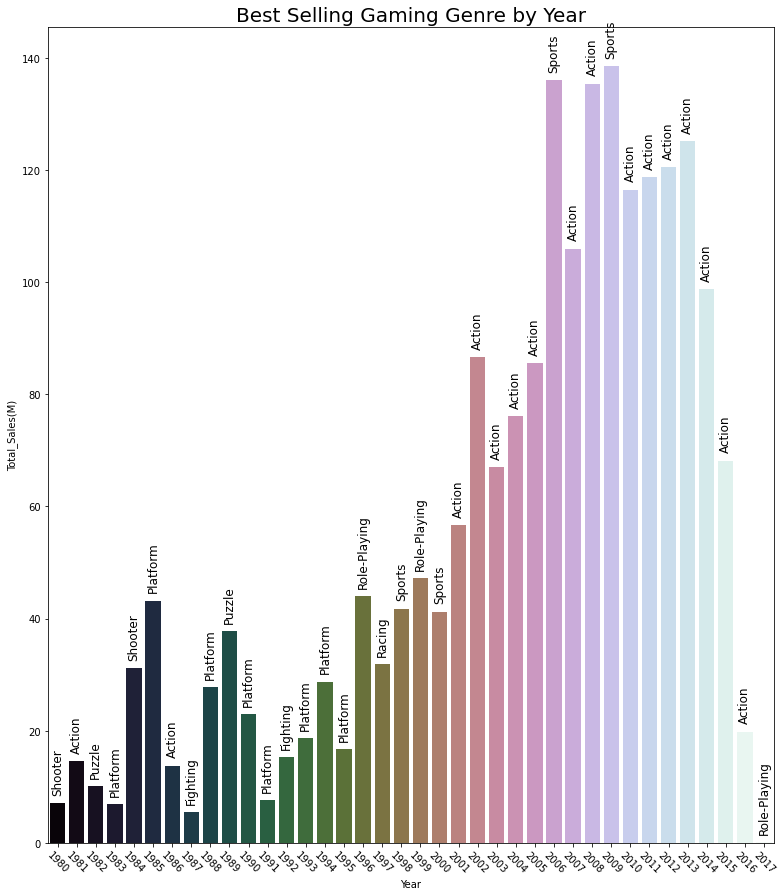

In [23]:
# Plot <best selling gaming genre by year>
fig, ax = plt.subplots(figsize=(13, 15))
bar = sns.barplot(x='Year', y='Total_Sales(M)', data=year_genre_df, palette = 'cubehelix',)
plt.title('Best Selling Gaming Genre by Year', fontsize = 20)
# plt.legend(handles=bar,labels=list(df_year_genre['Total_Sales(M)'])) ## 범례
for index, row in year_genre_df.iterrows():
    plt.text(index , row['Total_Sales(M)'] + 2, str(row.Genre), color='black', ha="center", rotation = 90, size=12)

plt.xticks(rotation = -45)
plt.show()

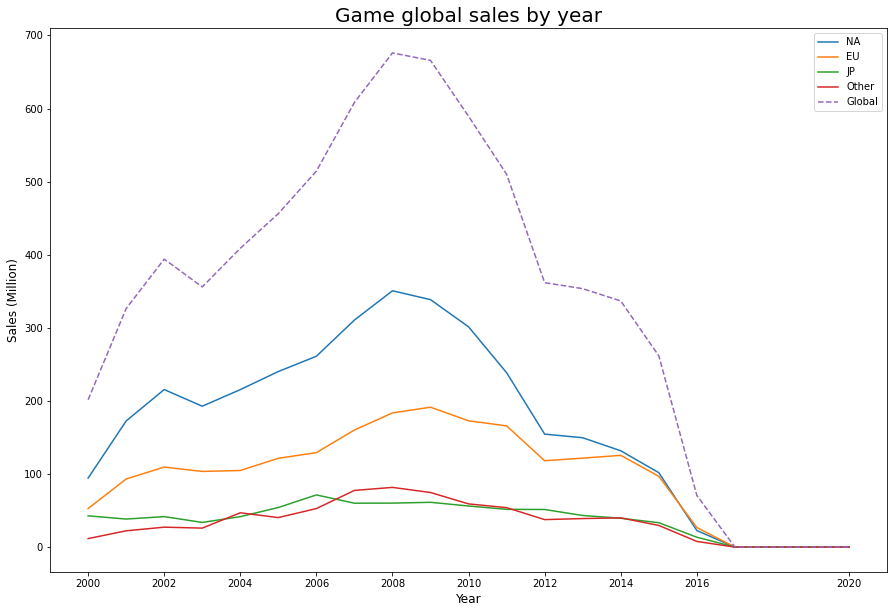

In [24]:
# To understand the recent trend, zoom-in the graph as a game released in the 2000s.
subset_year = df.groupby(by="Year").sum()
subset_year.drop("Multiplatform", axis=1 ,inplace=True)
subset_year = subset_year[subset_year.index >= 2000]

plt.figure(figsize = (15,10))

plt.plot(subset_year.index, subset_year[subset_year.columns[0]], label = "NA")
plt.plot(subset_year.index, subset_year[subset_year.columns[1]], label = "EU")
plt.plot(subset_year.index, subset_year[subset_year.columns[2]], label = "JP")
plt.plot(subset_year.index, subset_year [subset_year.columns[3]], label = "Other")
plt.plot(subset_year.index, subset_year[subset_year.columns[4]], linestyle='--', label = "Global")

# Set the xticks to show every 2 years
plt.xticks(subset_year.index[::2])

plt.legend(loc='best')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Sales (Million)', fontsize = 12)
plt.title('Game global sales by year', fontsize = 20)
plt.show()

Overall, the sale is highest in North America followed by EU.

In [25]:
year_list = []
genre_list = []
sale_list = []

subset_year_genre = df[df['Year']>=2000].groupby(['Year','Genre']).sum()['Total_Sales(M)'].reset_index()

for i in range(2000, 2018) :
    year_genre = subset_year_genre[subset_year_genre['Year'] == i].sort_values(by='Total_Sales(M)',ascending=False).reset_index(drop=True)

    best_genre = year_genre.loc[0, 'Genre']
    best_genre_sale =  year_genre.loc[0, 'Total_Sales(M)']

    year_list.append(i)
    genre_list.append(best_genre)
    sale_list.append(best_genre_sale)
    
df_year_genre = pd.DataFrame((zip(year_list, genre_list, sale_list)), columns = ['Year', 'Genre', 'Total_Sales(M)'])
df_year_genre

,Year,Genre,Total_Sales(M)
0,2000,Sports,41.24
1,2001,Action,56.68
2,2002,Action,86.65
3,2003,Action,67.04
4,2004,Action,76.15
5,2005,Action,85.52
6,2006,Sports,136.12
7,2007,Action,105.99
8,2008,Action,135.46
9,2009,Sports,138.59


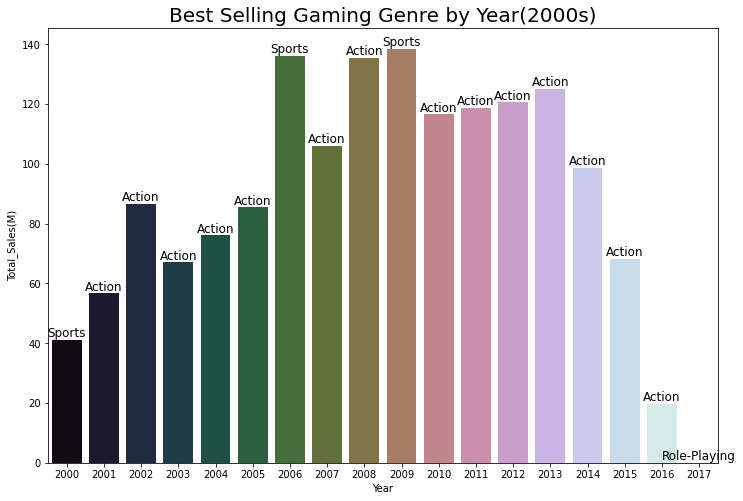

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
bar = sns.barplot(x='Year', y='Total_Sales(M)', data=df_year_genre, palette = 'cubehelix')
plt.title('Best Selling Gaming Genre by Year(2000s)', fontsize = 20)

for index, row in df_year_genre.iterrows():
    plt.text(index , row['Total_Sales(M)'] + 1, str(row.Genre), color='black', ha="center", size=12)
plt.show()

Action is best-selling in most year.
It can be because of the high number of released Action game Action game.<br>
Calculate total_sales by genre / # of released game to see the average sale by genre

In [27]:
new_df = df_2000.groupby('Genre')['Total_Sales(M)'].sum().reset_index(name='Total_Sales')
new_df.set_index('Genre', inplace=True)
new_df

,Total_Sales
Genre,
Action,1520.11
Adventure,183.60
Fighting,312.75
Misc,706.58
Platform,496.56
Puzzle,138.46
Racing,559.68
Role-Playing,700.20
Shooter,895.84


This explains that Action is highly selling too.

In [28]:
# Count the number of occurrences of each genre
genre_counts = df_2000['Genre'].value_counts()

# Create a new dataframe with total sales and genre count for each genre
genre_df = pd.DataFrame({'Total_Sales': df_2000.groupby('Genre')['Total_Sales(M)'].sum(),
                         'Genre_Count': genre_counts})

# Set the index of the new dataframe to the genre
genre_df.index.name = 'Genre'

# Display the new dataframe
print(genre_df)

              Total_Sales  Genre_Count
Genre                                 
Action            1520.11         2997
Adventure          183.60         1156
Fighting           312.75          637
Misc               706.58         1544
Platform           496.56          710
Puzzle             138.46          464
Racing             559.68         1027
Role-Playing       700.20         1272
Shooter            895.84         1110
Simulation         336.59          752
Sports            1126.00         1966
Strategy           115.36          541


In [29]:
genre_df['Average_sale_genre'] = genre_df['Total_Sales'] / genre_df['Genre_Count']
genre_df

,Total_Sales,Genre_Count,Average_sale_genre
Genre,,,
Action,1520.11,2997,0.507211
Adventure,183.60,1156,0.158824
Fighting,312.75,637,0.490973
Misc,706.58,1544,0.457630
Platform,496.56,710,0.699380
Puzzle,138.46,464,0.298405
Racing,559.68,1027,0.544966
Role-Playing,700.20,1272,0.550472
Shooter,895.84,1110,0.807063


This shows that the average sale of Shooter is the highest as 0.807063.

# Q2. Can the preferred game genre differ depending on the region?

In [30]:
df_2000.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

most important regions for the video game industry: North America - China - Japan

Chinese prefer its own game due to government's strictest limits on gaming.

So, the data only includes US, Japan, EU, and Other.

In [31]:
# creating a dataframe named 'by_region'
by_region = pd.DataFrame({'Genre': df_2000['Genre'].values,
                          'NA': df_2000['NA_Sales(M)'].values,
                          'EU': df_2000['EU_Sales(M)'].values,
                          'JP': df_2000['JP_Sales(M)'].values,
                          'Other': df_2000['Other_Sales(M)'].values,
                          'Total': df_2000['Total_Sales(M)'].values})

by_region = by_region.groupby('Genre').sum().reset_index()
by_region

,Genre,NA,EU,JP,Other,Total
0,Action,746.92,468.69,127.71,176.79,1520.11
1,Adventure,82.06,49.88,36.58,15.08,183.60
2,Fighting,160.62,75.41,44.71,32.01,312.75
3,Misc,359.86,193.86,82.50,70.36,706.58
4,Platform,258.39,141.06,55.09,42.02,496.56
5,Puzzle,64.34,40.20,23.68,10.24,138.46
6,Racing,270.75,191.92,27.30,69.71,559.68
7,Role-Playing,270.34,150.50,230.60,48.76,700.20
8,Shooter,484.67,289.70,22.78,98.69,895.84
9,Simulation,163.17,104.24,40.06,29.12,336.59


In [32]:
#Grouping the north america sales(M) based on each Genre
data1 = pd.DataFrame(df_2000.groupby("Genre")[["NA_Sales(M)"]].sum().sort_values(by=['NA_Sales(M)'],ascending=[False]).reset_index())
data1.rename(columns = {'Genre':'Genre_NA'}, inplace = True)

#Grouping the europe sales(M) based on each Genre
data2 = pd.DataFrame(df_2000.groupby("Genre")[["EU_Sales(M)"]].sum().sort_values(by=['EU_Sales(M)'],ascending=[False]).reset_index())
data2.rename(columns = {'Genre':'Genre_EU'}, inplace = True)

#Grouping the japan sales(M) based on each Genre
data3 = pd.DataFrame(df_2000.groupby("Genre")[["JP_Sales(M)"]].sum().sort_values(by=['JP_Sales(M)'],ascending=[False]).reset_index())
data3.rename(columns = {'Genre':'Genre_JP'}, inplace = True)

#Grouping the other region sales(M) based on each Genre
data4 = pd.DataFrame(df_2000.groupby("Genre")[["Other_Sales(M)"]].sum().sort_values(by=['Other_Sales(M)'],ascending=[False]).reset_index())
data4.rename(columns = {'Genre':'Genre_Other'}, inplace = True)

#Grouping the global sales(M) based on each Genre
data5 = pd.DataFrame(df_2000.groupby("Genre")[["Total_Sales(M)"]].sum().sort_values(by=['Total_Sales(M)'],ascending=[False]).reset_index())
data5.rename(columns = {'Genre':'Genre_Total'}, inplace = True)

#Concatenating our datasets
sales_data=pd.concat([data1,data2,data3,data4,data5],axis=1)
sales_data

,Genre_NA,NA_Sales(M),Genre_EU,EU_Sales(M),Genre_JP,JP_Sales(M),Genre_Other,Other_Sales(M),Genre_Total,Total_Sales(M)
0,Action,746.92,Action,468.69,Role-Playing,230.60,Action,176.79,Action,1520.11
1,Sports,585.02,Sports,339.18,Action,127.71,Sports,126.09,Sports,1126.00
2,Shooter,484.67,Shooter,289.70,Misc,82.50,Shooter,98.69,Shooter,895.84
3,Misc,359.86,Misc,193.86,Sports,75.71,Misc,70.36,Misc,706.58
4,Racing,270.75,Racing,191.92,Platform,55.09,Racing,69.71,Role-Playing,700.20
5,Role-Playing,270.34,Role-Playing,150.50,Fighting,44.71,Role-Playing,48.76,Racing,559.68
6,Platform,258.39,Platform,141.06,Simulation,40.06,Platform,42.02,Platform,496.56
7,Simulation,163.17,Simulation,104.24,Adventure,36.58,Fighting,32.01,Simulation,336.59
8,Fighting,160.62,Fighting,75.41,Strategy,27.51,Simulation,29.12,Fighting,312.75
9,Adventure,82.06,Adventure,49.88,Racing,27.30,Adventure,15.08,Adventure,183.60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Role-Playing'),
  Text(6, 0, 'Platform'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Fighting'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

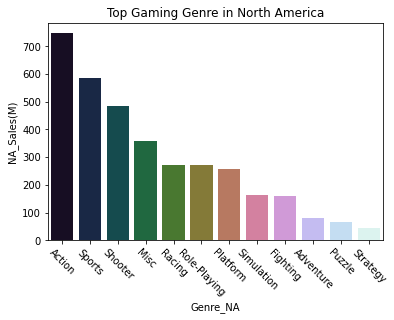

In [33]:
sns.barplot(data=sales_data, x = 'Genre_NA', y = 'NA_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in North America')
plt.xticks(rotation = -45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Role-Playing'),
  Text(6, 0, 'Platform'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Fighting'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

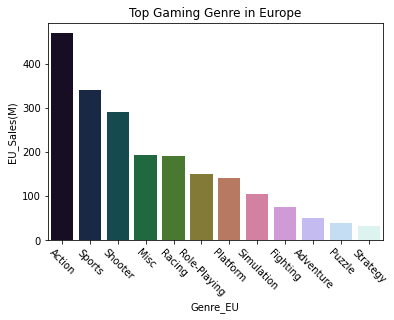

In [34]:
sns.barplot(data=sales_data, x = 'Genre_EU', y = 'EU_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in Europe')
plt.xticks(rotation = -45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Role-Playing'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Fighting'),
  Text(6, 0, 'Simulation'),
  Text(7, 0, 'Adventure'),
  Text(8, 0, 'Strategy'),
  Text(9, 0, 'Racing'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Shooter')])

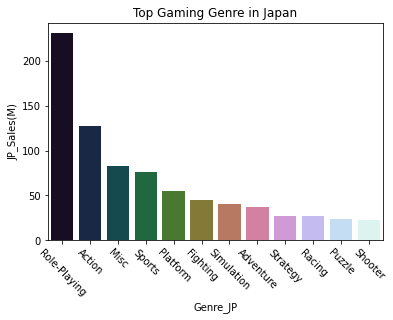

In [35]:
sns.barplot(data=sales_data, x = 'Genre_JP', y = 'JP_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in Japan')
plt.xticks(rotation = -45)

Japan shows different trend from other regions. RPG is the best-selling genre. Let's look up the Role-Playing data in Japan.

In [36]:
JP_rp = df_2000[df_2000['Genre']=='Role-Playing']
JP_rp = JP_rp.sort_values('JP_Sales(M)',ascending=False).reset_index()
JP_rp.head()

,index,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,10281,Pokemon Diamond/Pokemon Pearl,DS,False,Handheld,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
1,10345,Pokemon Black/Pokemon White,DS,False,Handheld,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
2,10633,Pokemon Ruby/Pokemon Sapphire,GBA,False,Handheld,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
3,1809,Monster Hunter Freedom 3,PSP,False,Handheld,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87
4,5074,Dragon Quest IX: Sentinels of the Starry Skies,DS,False,Handheld,2009,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.85


Pokemon took the first 3 games. It can be interpreted that if we are targeting Japan, Pokemon RPG can be the best choice.

First, Pokemon is a franchise that originated in Japan and has a strong cultural connection with the country. The games feature creatures based on Japanese mythology and the game's world is heavily inspired by Japanese culture.

Secondly, the Pokemon games were released at the right time, during the mid-1990s, when video games were becoming increasingly popular in Japan. Pokemon games were able to capitalize on this trend and became an instant hit.

Finally, the Pokemon games were designed with a unique gameplay mechanic that encourages players to collect and trade creatures with each other. This social aspect of the game has helped to create a strong community of Pokemon fans in Japan and around the world.

In [37]:
df_2000[df_2000['Name'].str.contains('Pokemon')]

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
250,Pokemon Trozei!,DS,False,Handheld,2005,Puzzle,Nintendo,0.26,0.00,0.31,0.02,0.59
1223,Pokemon Conquest,DS,False,Handheld,2012,Role-Playing,Nintendo,0.58,0.06,0.37,0.04,1.05
1400,Pokemon Art Academy,3DS,False,Handheld,2014,Misc,Nintendo,0.18,0.12,0.16,0.03,0.49
1772,Pokemon FireRed/Pokemon LeafGreen,GBA,False,Handheld,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
1773,Pokemon Rumble Blast,3DS,False,Handheld,2011,Action,Nintendo,0.47,0.26,0.35,0.07,1.15
1884,Pokemon Mystery Dungeon: Explorers of Sky,DS,False,Handheld,2009,Role-Playing,Nintendo,0.58,0.44,0.44,0.12,1.58
3982,Pokemon Ranger: Guardian Signs,DS,False,Handheld,2010,Role-Playing,Nintendo,0.51,0.17,0.58,0.06,1.32
4138,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,False,Handheld,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
4674,Pokemon HeartGold/Pokemon SoulSilver,DS,False,Handheld,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
5362,Pokemon Ranger: Shadows of Almia,DS,False,Handheld,2008,Role-Playing,Nintendo,0.95,0.54,0.62,0.18,2.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Racing'),
  Text(5, 0, 'Role-Playing'),
  Text(6, 0, 'Platform'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

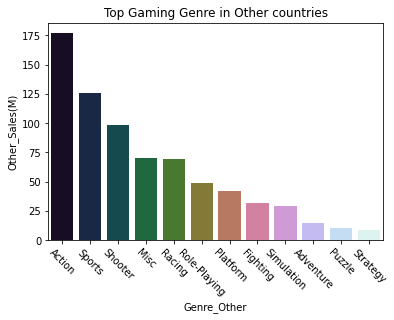

In [38]:
sns.barplot(data=sales_data, x = 'Genre_Other', y = 'Other_Sales(M)',
            palette = 'cubehelix',            
            saturation = 8).set(title='Top Gaming Genre in Other countries')
plt.xticks(rotation = -45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Role-Playing'),
  Text(5, 0, 'Racing'),
  Text(6, 0, 'Platform'),
  Text(7, 0, 'Simulation'),
  Text(8, 0, 'Fighting'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

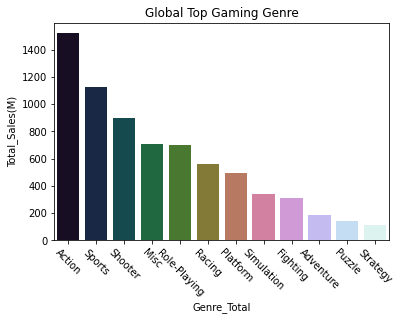

In [39]:
sns.barplot(data=sales_data, x = 'Genre_Total', y = 'Total_Sales(M)',
            palette = 'cubehelix', saturation = 8).set(title='Global Top Gaming Genre')
plt.xticks(rotation = -45)

지역구분: NA, EU, JP, Others, Global <br>
지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?

It can be seen that the preferred genre is different by region.
Preferred genre outside of Japan: Action, Sports, Shooter
Preferred genre in Japan: Role-Playing, Action, Sports-> Unlike other regions, shooter is at the bottom, and role-playing genre is dominant.

Also, result from "JP_rp" shows that the top 3 role-playing games in Japan are Pokemon-titled. We can also see that Japanese prefer their own games in that Nintendo and Pokemon are Japanese companies.

# Q3. More analysis and visualization on popular game

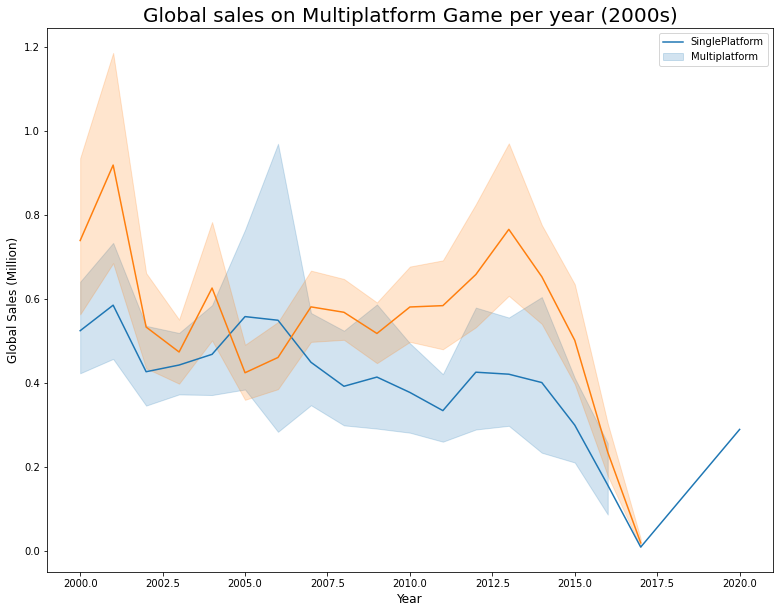

In [40]:
# single- vs multi- platform
plt.figure(figsize = (13,10))

sns.lineplot(x='Year', y='Total_Sales(M)', data=df_2000[df_2000['Year']>=2000], hue='Multiplatform')
ax.set_xlim(2000, 2020)

plt.legend(loc='best',labels = ['SinglePlatform', 'Multiplatform'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Global Sales (Million)', fontsize = 12)
plt.title('Global sales on Multiplatform Game per year (2000s)', fontsize = 20)

plt.show()

Overall, multi-platform game sales are higher than single-platform in the global market.

In [41]:
# 2000s sales in global gaming market by platform
subset_ym = df_2000.groupby(by=['Year','Platform_Group','Multiplatform']).sum()
subset_ym = subset_ym.reset_index()
subset_ym

,Year,Platform_Group,Multiplatform,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,2000,Handheld,False,4.00,2.26,6.90,1.25,14.41
1,2000,Handheld,True,2.44,1.28,2.14,0.24,6.10
2,2000,Home,False,52.93,31.23,26.70,6.60,117.46
3,2000,Home,True,32.02,16.52,7.03,3.35,58.92
4,2000,PC,False,3.02,1.41,0.00,0.17,4.60
...,...,...,...,...,...,...,...,...
101,2016,PC,True,0.70,1.21,0.00,0.14,2.05
102,2017,Handheld,False,0.00,0.00,0.01,0.00,0.01
103,2017,Handheld,True,0.00,0.00,0.01,0.00,0.01
104,2017,Home,True,0.00,0.00,0.03,0.00,0.03


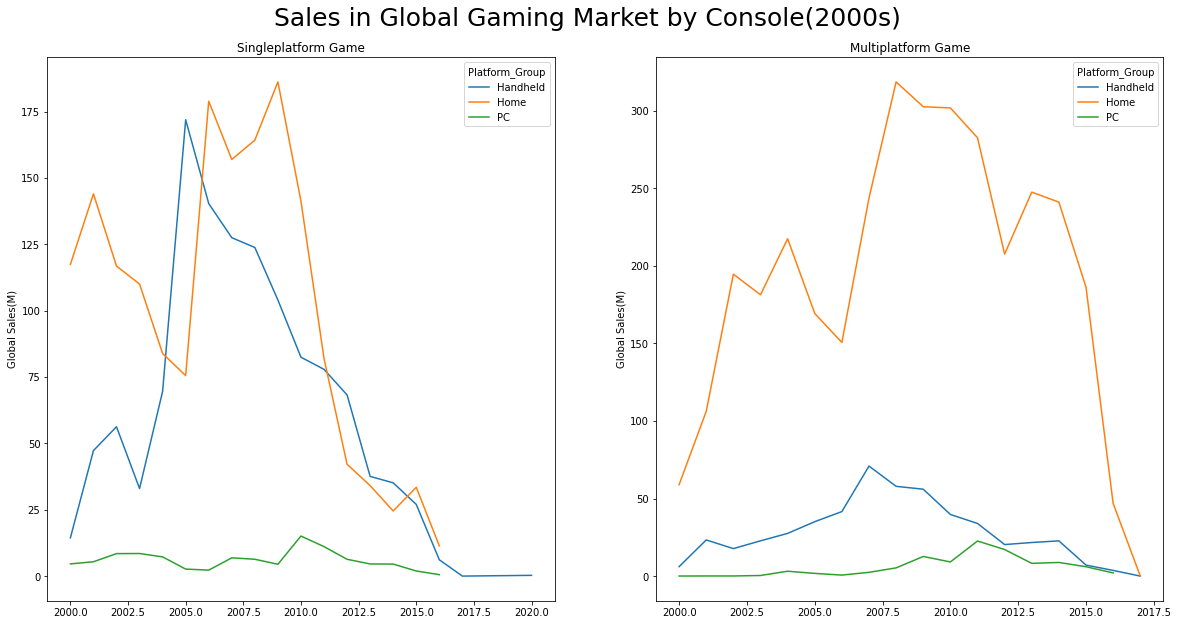

In [42]:
fig , ax = plt.subplots(1,2, figsize=(20,10))
sns.lineplot(x = 'Year', y='Total_Sales(M)', hue = 'Platform_Group', data=subset_ym[subset_ym['Multiplatform']==0], ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Global Sales(M)', fontsize = 10)
ax[0].set_title('Singleplatform Game')

sns.lineplot(x = 'Year', y='Total_Sales(M)', hue = 'Platform_Group', data=subset_ym[subset_ym['Multiplatform']==1], ax=ax[1])
ax[1].set_xlabel(' ')
ax[1].set_ylabel('Global Sales(M)', fontsize = 10)
ax[1].set_title('Multiplatform Game')

fig.suptitle('Sales in Global Gaming Market by Console(2000s)', fontsize=25, y=0.95)
plt.show()

In the Multiplatform plot, it can be seen that home video game console sales are overwhelmingly high.<br>

> If we plan a Handheld video game, a single platform will help your sales..<br>
> If we develop a home video game, a multi-platform will help sales.






Text(0.5, 1.0, 'Global Sales by Platform Console(2000s)')

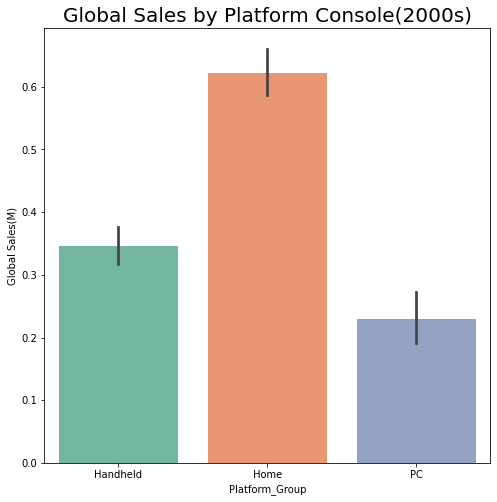

In [48]:
# Platform_Group-
f, ax = plt.subplots(1,1, figsize=(8, 8))
sns.barplot(x = 'Platform_Group', y='Total_Sales(M)', data= df_2000, palette = 'Set2')
ax.set_ylabel('Global Sales(M)')
ax.set_title('Global Sales by Platform Console(2000s)', fontsize = 20)

platform console comparison in Action Genre

In [49]:
# # Does the publisher have any impact on the regional sales?
sales_top = df_2000.sort_values(by='Total_Sales(M)', ascending=False)
sales_top = sales_top.head(10).reset_index(drop=True)
sales_top

,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Wii Sports,Wii,False,Home,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Mario Kart Wii,Wii,False,Home,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
2,Wii Sports Resort,Wii,False,Home,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,New Super Mario Bros.,DS,False,Handheld,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,Wii Play,Wii,False,Home,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
5,New Super Mario Bros. Wii,Wii,False,Home,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
6,Nintendogs,DS,False,Handheld,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
7,Mario Kart DS,DS,False,Handheld,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
8,Wii Fit,Wii,False,Home,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
9,Wii Fit Plus,Wii,False,Home,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [45]:
subset = sales_top.groupby('Publisher').sum().sort_values(by='Total_Sales(M)', ascending=False).reset_index()
subset

,Publisher,Multiplatform,Year,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,Nintendo,1,50183,223.04,171.31,91.61,44.98,530.94
1,Activision,10,20112,69.46,44.21,2.78,15.59,132.04
2,Take-Two Interactive,8,16063,56.79,37.65,3.15,23.84,121.43
3,Microsoft Game Studios,0,6027,29.97,9.75,0.45,3.66,43.83
4,Sony Computer Entertainment,0,6015,12.82,9.98,3.78,10.81,37.39
5,Ubisoft,1,2011,6.05,3.15,0.00,1.07,10.27


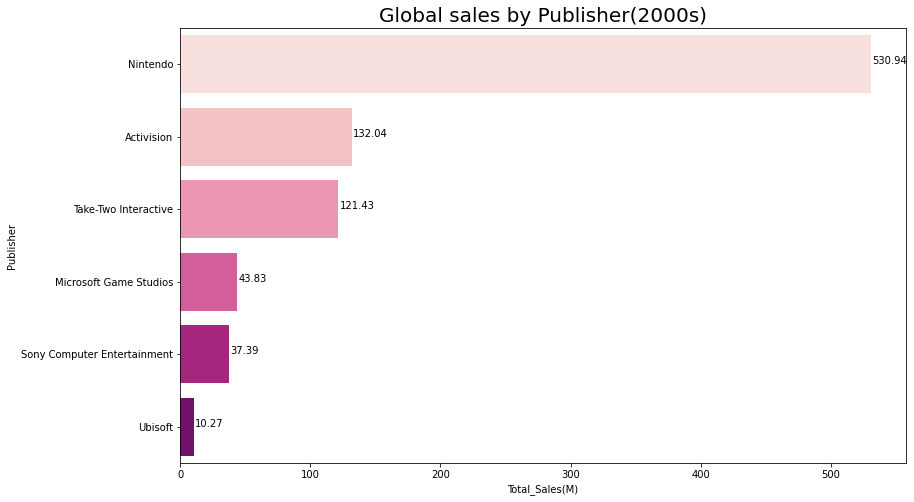

In [46]:
publisher = sales_top['Publisher'].values
plt.figure(figsize=(13, 8))
sales_top_bar = sns.barplot(x ='Total_Sales(M)', y='Publisher', data=subset, palette = 'RdPu')
cnt = 0
for value in subset['Total_Sales(M)']:
    sales_top_bar.text(x=value +1, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1

plt.title('Global sales by Publisher(2000s)', fontsize = 20)
plt.show()

Nintendo has the largest number of sales shares globally.

### Platform 기준

In [50]:
genre_f = (df_2000.Genre == 'Action') & (df_2000.Year > 2000) # mostly Action
df_act = df_2000.loc[genre_f].reset_index(drop = True)
df_act=df_act.sort_values(by='Total_Sales(M)', ascending=False).reset_index()
df_act

,index,Name,Platform,Multiplatform,Platform_Group,Year,Genre,Publisher,NA_Sales(M),EU_Sales(M),JP_Sales(M),Other_Sales(M),Total_Sales(M)
0,630,Grand Theft Auto V,PS3,True,Home,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,2602,Grand Theft Auto: San Andreas,PS2,True,Home,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2,1938,Grand Theft Auto V,X360,True,Home,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,980,Grand Theft Auto: Vice City,PS2,True,Home,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
4,1749,Grand Theft Auto III,PS2,True,Home,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2646,Winx Club: Saving Alfea,3DS,True,Handheld,2014,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
2950,2137,Collar x Malice,PSV,False,Handheld,2016,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
2951,1215,God Eater Off Shot: Soma Shikkuzaru-hen Twin P...,PS4,False,Home,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
2952,188,Dragon's Dogma Online: Season 2,PS4,False,Home,2016,Action,Capcom,0.00,0.00,0.01,0.00,0.01


In [51]:
df_act_platform = df_act.groupby(['Platform'])['Total_Sales(M)'].sum().reset_index()
df_act_platform

,Platform,Total_Sales(M)
0,3DS,56.08
1,DC,0.04
2,DS,113.91
3,GB,3.65
4,GBA,53.19
5,GC,37.11
6,N64,0.16
7,PC,25.06
8,PS,12.46
9,PS2,266.29


In [52]:
df_act_platform = df_act_platform.sort_values(by='Total_Sales(M)', ascending=False).reset_index()
df_act_platform

,index,Platform,Total_Sales(M)
0,10,PS3,301.49
1,9,PS2,266.29
2,16,X360,239.58
3,2,DS,113.91
4,14,Wii,110.16
5,11,PS4,84.70
6,12,PSP,61.89
7,0,3DS,56.08
8,4,GBA,53.19
9,17,XB,47.44


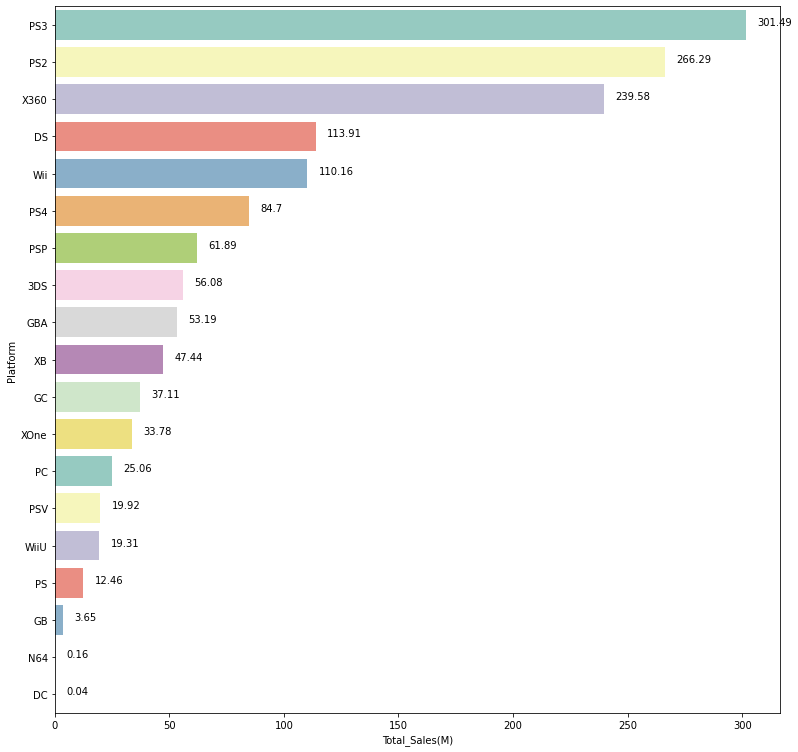

In [53]:
platform = df_act_platform['Platform'].values
plt.figure(figsize=(13, 13))
df_act_platform_sales = sns.barplot(x ='Total_Sales(M)', y='Platform', data=df_act_platform, palette='Set3')
cnt = 0
for value in df_act_platform['Total_Sales(M)']:
    df_act_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.show()

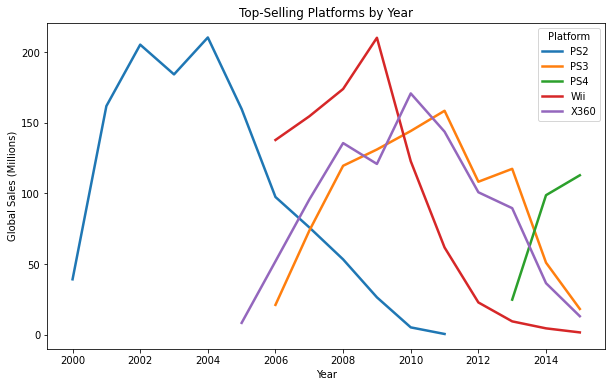

In [59]:
top_platforms = ['PS2', 'PS3', 'PS4','Wii','X360']

# Filter the dataframe to include only the top-selling platforms
df_top = df[(df.Platform.isin(top_platforms)) & (df_2000['Year'] <= 2015)]

# Group the filtered dataframe by year and platform, and aggregate the sales data
df_sales = df_top.groupby(['Year', 'Platform']).agg({'Total_Sales(M)': 'sum'}).reset_index()

# Reshape the dataframe using the pivot function
df_pivot = df_sales.pivot(index='Year', columns='Platform', values='Total_Sales(M)')

# Plot the data using the plot function
df_pivot.plot(figsize=(10, 6), linewidth=2.5)
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.title('Top-Selling Platforms by Year')
plt.legend(title='Platform')
plt.show()

Due to the launch of the PS4, other platforms are losing sales.

# Q4. Conclusion

Action: Red Ocean<br>
Shooter Genre is a good choice.<br>
Sports: recent sales is not that good<br>

1. The sales graph is flowing in a similar direction to NA sales. Thus, if the shooter genre is released in North America, additional profits from European games can also be expected.

2. If it is released as a PS4 and PC cross-platform, it expects high profits.